(e)

In [2]:
import numpy as np

data = np.load('../data/toy-data.npz')
print("content", data.files)
for name in data.files:
    arr = data[name]
    print(f"{name} shape: {arr.shape}")
    print(arr)

content ['training_data', 'training_labels', 'test_data']
training_data shape: (1000, 2)
[[ 4.76405235  3.40015721]
 [ 3.97873798  5.2408932 ]
 [ 4.86755799  2.02272212]
 ...
 [-2.80217183 -2.9022492 ]
 [-1.59847658 -2.84156615]
 [-4.14190142 -4.31097037]]
training_labels shape: (1000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

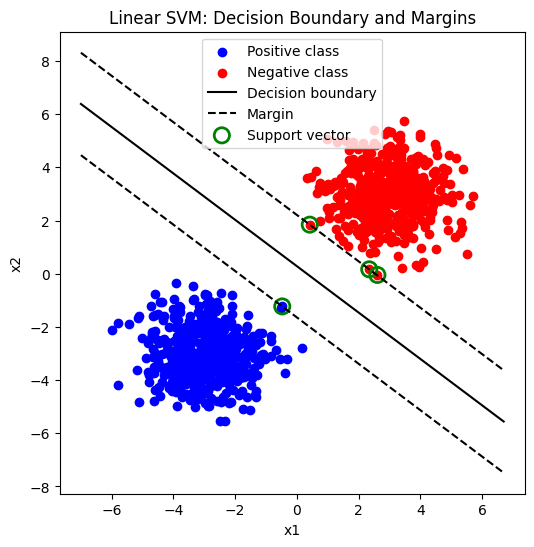

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load('../data/toy-data.npz')
X = data['training_data']
y = data['training_labels']

# Convert labels from {0,1} to {-1,1}
y = y * 2 - 1

# Given SVM parameters
w = np.array([-0.4528, -0.5190])
alpha = 0.1471

# Plot data points
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Positive class')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='r', label='Negative class')

# Plot decision boundary and margin lines
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 200)
yy = -(w[0] * xx + alpha) / w[1]
yy_plus = -(w[0] * xx + alpha - 1) / w[1]
yy_minus = -(w[0] * xx + alpha + 1) / w[1]

plt.plot(xx, yy, 'k-', label='Decision boundary')
plt.plot(xx, yy_plus, 'k--', label='Margin')
plt.plot(xx, yy_minus, 'k--')

# Highlight support vectors: |w·x + alpha| ≈ 1
decision_value = X @ w + alpha
sv_mask = np.isclose(np.abs(decision_value), 1, atol=1e-2)
plt.scatter(X[sv_mask, 0], X[sv_mask, 1], s=120, facecolors='none', edgecolors='g', linewidths=2, label='Support vector')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Linear SVM: Decision Boundary and Margins')
plt.show()

Margin 和 Decision Boundary 的计算方法如下：

- **Decision Boundary（决策边界）**  
  决策边界是满足 $w \cdot x + \alpha = 0$ 的所有点的集合。  
  由于 $x$ 是二维向量 $[x_1, x_2]$，$w$ 也是二维向量 $[w_0, w_1]$，所以有：
  $$
  w_0 x_1 + w_1 x_2 + \alpha = 0
  $$
  解出 $x_2$ 得：
  $$
  x_2 = -\frac{w_0 x_1 + \alpha}{w_1}
  $$
  这就是代码里
  ```python
  yy = -(w[0] * xx + alpha) / w[1]
  ```
  的由来。

- **Margin（边界线）**  
  Margin 是满足 $w \cdot x + \alpha = 1$ 和 $w \cdot x + \alpha = -1$ 的所有点的集合。  
  同理，解出 $x_2$ 得：
  $$
  x_2 = -\frac{w_0 x_1 + \alpha - 1}{w_1} \quad \text{和} \quad x_2 = -\frac{w_0 x_1 + \alpha + 1}{w_1}
  $$
  这对应代码里的
  ```python
  yy_plus = -(w[0] * xx + alpha - 1) / w[1]
  yy_minus = -(w[0] * xx + alpha + 1) / w[1]
  ```

**总结**：  
- 决策边界是 SVM 分类的分界线。  
- 两条 margin 线是支持向量机最大间隔的两侧界限，支持向量恰好落在这两条线上。

对于线性 SVM，决策边界的方程是 $w_0 x_1 + w_1 x_2 + \alpha = 0$。  
我们可以将其变形为 $x_2 = -\frac{w_0}{w_1} x_1 - \frac{\alpha}{w_1}$。

其中，$-\frac{w_0}{w_1}$ 就是这条直线的斜率（slope）。

**英文代码注释如下：**


$w_0$ 和 $w_1$ 是线性 SVM 学习得到的参数（权重），它们组成了权重向量 $w = [w_0, w_1]$。

在 SVM 的优化过程中，模型会自动寻找一组 $w$ 和 $\alpha$，使得决策边界 $w_0 x_1 + w_1 x_2 + \alpha = 0$ 能最大化两类样本之间的间隔（margin），并尽量正确分类训练数据。

**简单来说：**
- $w_0$ 和 $w_1$ 是通过训练 SVM 模型、最小化损失函数后得到的参数。
- 它们的值由训练数据自动决定，不需要手动指定。

**英文代码注释示例：**


In [ ]:
# w[0] and w[1] are the weights learned by the SVM model from the training data.
# They define the orientation of the decision boundary in the feature space.



**中文补充说明：**  
你在题目中给出的 $w = [-0.4528, -0.5190]$ 就是模型训练后得到的参数。

In [ ]:
# The slope of the decision boundary is -w[0]/w[1]
slope = -w[0] / w[1]
print("Slope of the decision boundary:", slope)



**中文解释：**  
斜率的计算方法就是 $-\frac{w_0}{w_1}$，它表示决策边界（或 margin 线）在二维平面上的倾斜程度。  
你可以用上面的代码直接算出当前 SVM 决策边界的斜率。